In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('data/train.csv')
df_val = pd.read_csv('data/val.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train, df_val], axis=0)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
1,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
2,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
3,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
644,27.00,125.0,5.0,3.0,1,1,1,1,Nhà mặt phố,8.0,6.000000,Ngoại thành
645,31.00,75.0,8.0,10.0,1,1,1,1,Nhà trong hẻm,6.0,6.200000,Thanh Xuân
646,2.80,85.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.000000,Ngoại thành
647,12.00,54.0,4.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,4.300000,Hai Bà Trưng


# Visualize bar chart with each feature

In [3]:
features = df.drop(columns=['price', 'area', 'street_in_front_of_house', 'width'])
total_features = features.columns.to_list()
total_features

['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'district']

In [4]:
feature_unique_fields = {}
for i in total_features:
    feature_unique_fields[i] = features[i].unique().tolist()

len_features = len(feature_unique_fields)
for i in range(len_features):
    list(feature_unique_fields.values())[i].sort()
feature_unique_value = {}
for feature in total_features:
    # print("Feature: \n", feature)
    feature_len = len(feature_unique_fields[feature])
    # print("Len: ", feature_len)
    feature_value = feature_unique_fields[feature]
    # print(feature_value)
    feature_unique_value[feature] = [sum(df[df[feature] == feature_value[i]].price) / df[feature].value_counts()[feature_value[i]] for i in range(feature_len)]
    
# print(feature_unique_value)
feature_unique_fields


{'floor_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'bedroom_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'is_dinning_room': [0, 1],
 'is_kitchen': [0, 1],
 'is_terrace': [0, 1],
 'is_car_pack': [0, 1],
 'type': ['Căn hộ chung cư', 'Nhà mặt phố', 'Nhà trong hẻm'],
 'district': ['Ba Đình',
  'Bắc Từ Liêm',
  'Cầu Giấy',
  'Gia Lâm',
  'Hai Bà Trưng',
  'Hoàn Kiếm',
  'Hoàng Mai',
  'Hà Đông',
  'Long Biên',
  'Nam Từ Liêm',
  'Ngoại thành',
  'Thanh Xuân',
  'Tây Hồ',
  'Đông Anh',
  'Đống Đa']}

In [5]:
visualized_features = total_features
name_of_features = ['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']
labels = ['Số tầng', 'Số phòng ngủ', 'Có phòng ăn hay không', 'Có phòng bếp hay không', 'Có sân thượng hay không', 
'Có chỗ để xe hay không','Loại bất động sản','Thành phố', 'Quận/Huyện']
titles = ['Biểu đồ thể hiện giá nhà trung bình theo số tầng nhà','Biểu đồ giá nhà trung bình theo số phòng ngủ', 'Biểu đồ giá nhà trung bình theo phòng ăn', 
'Biểu đồ giá nhà trung bình có và không có bếp', 'Giá nhà trung bình với sân thượng', 'Giá nhà trung bình với chỗ để xe', 
'Biểu đồ thể hiện giá nhà trung bình theo loại bất động sản', 
'Biểu đồ thể hiện giá nhà trung bình theo thành phố', 'Biểu đồ thể hiện giá nhà trung bình theo quận/huyện bất động sản']

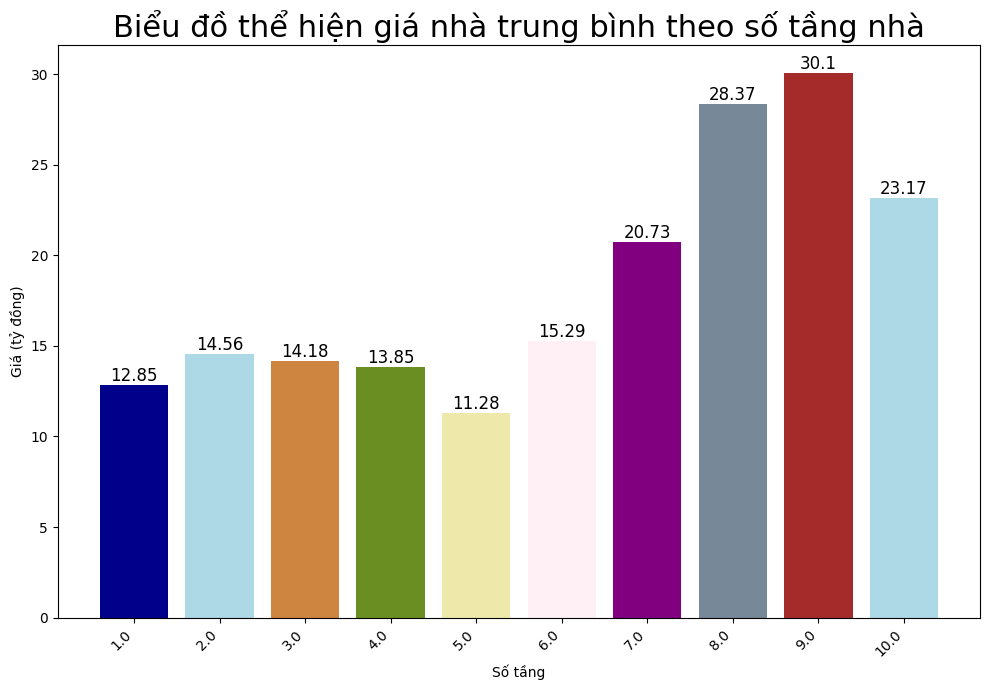

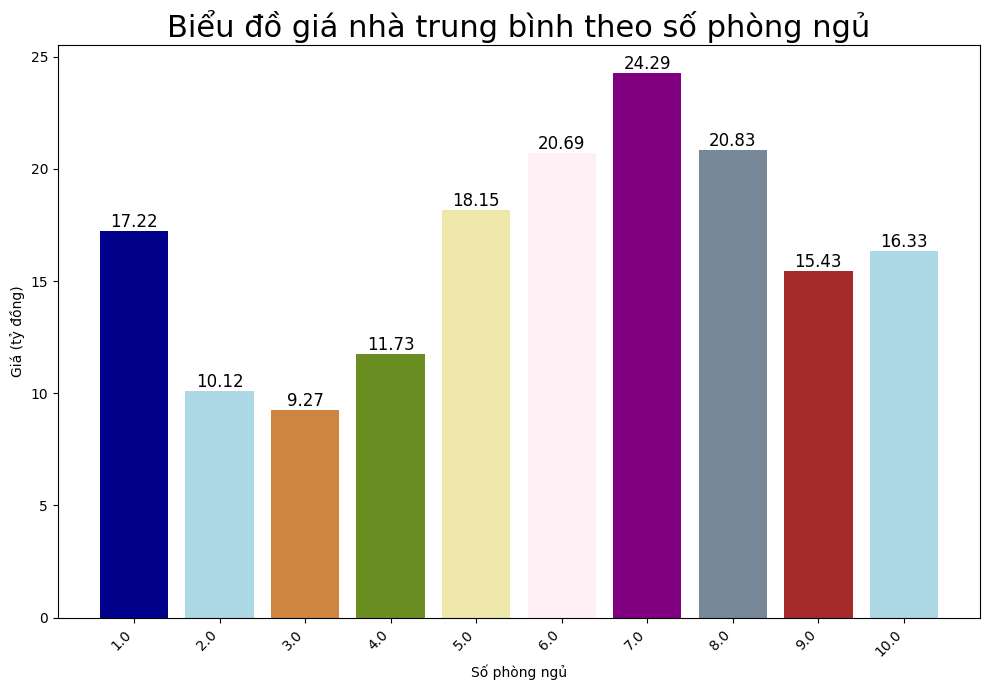

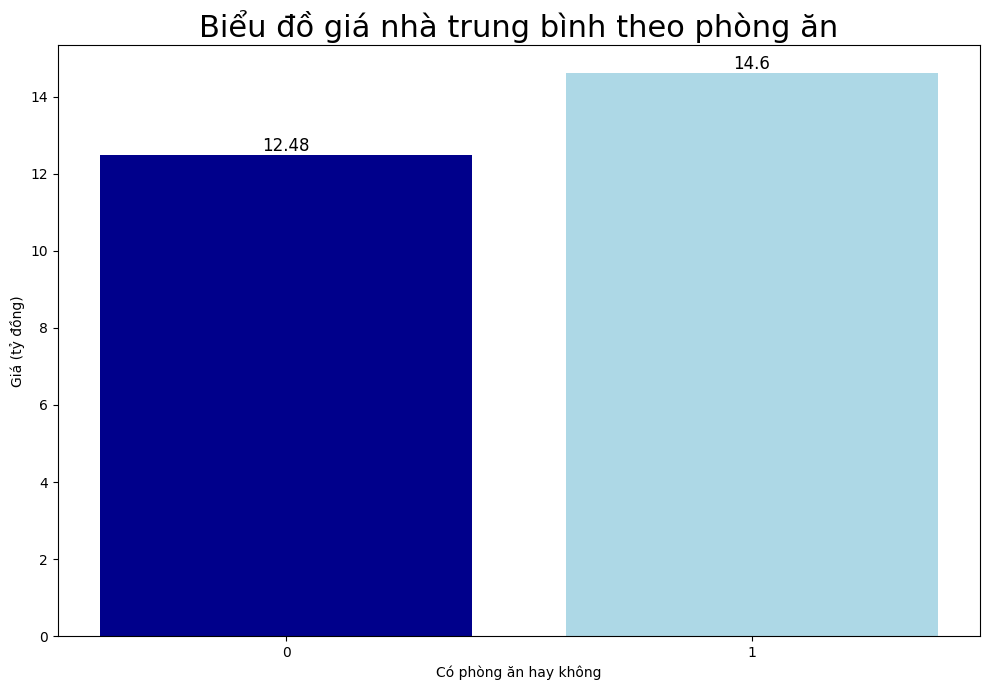

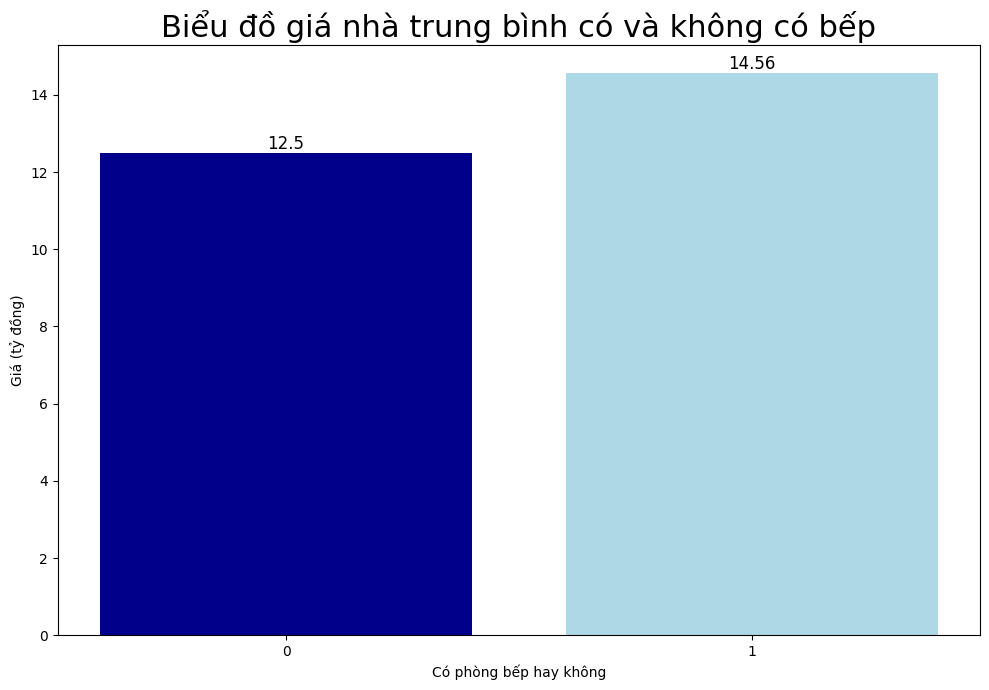

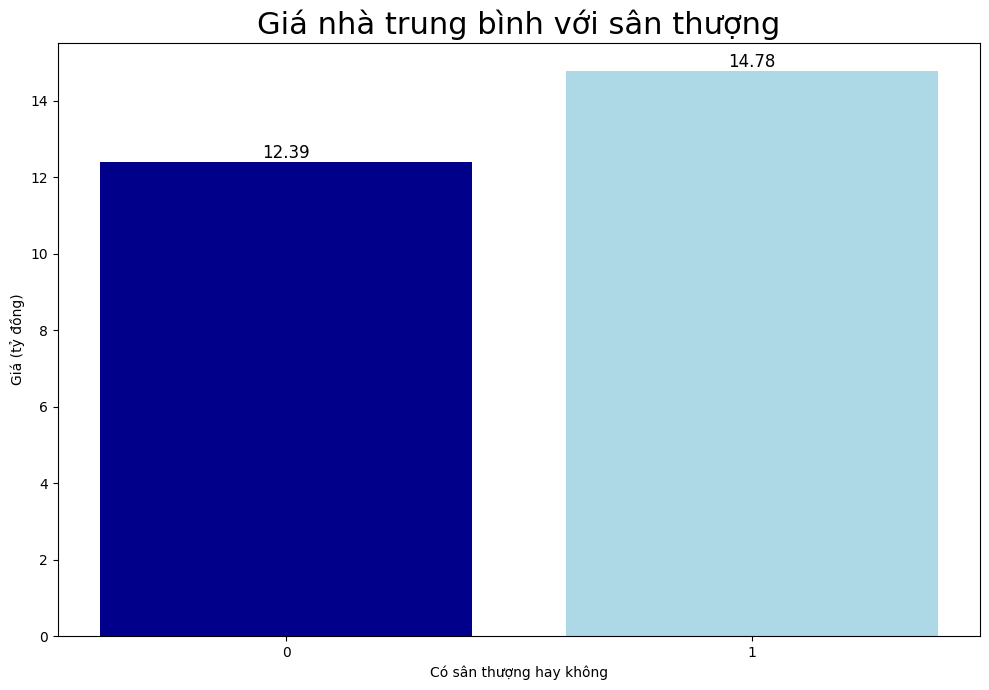

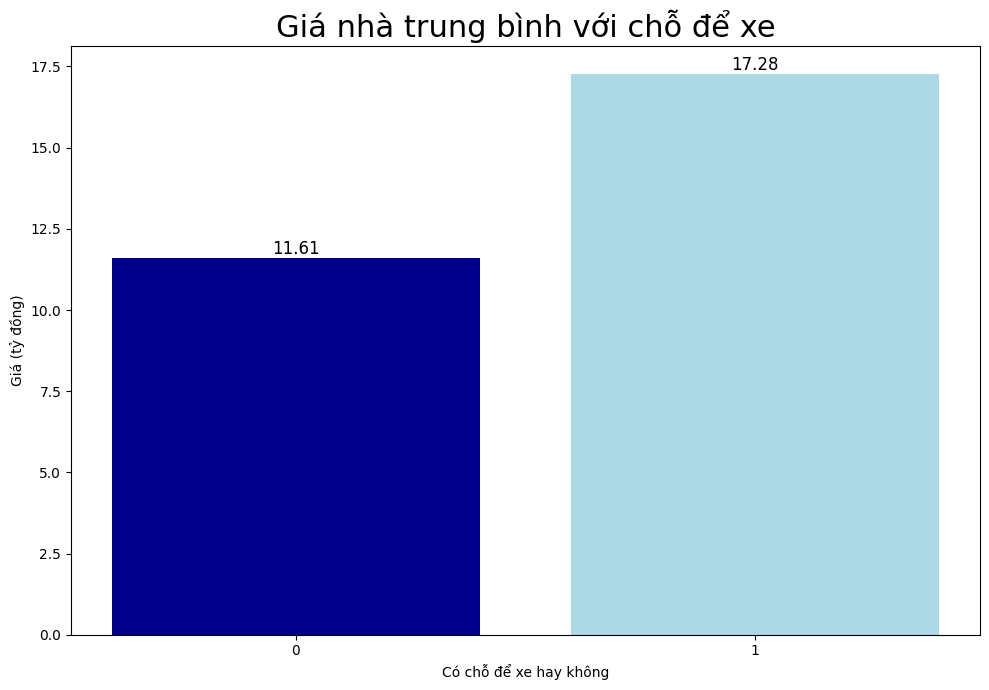

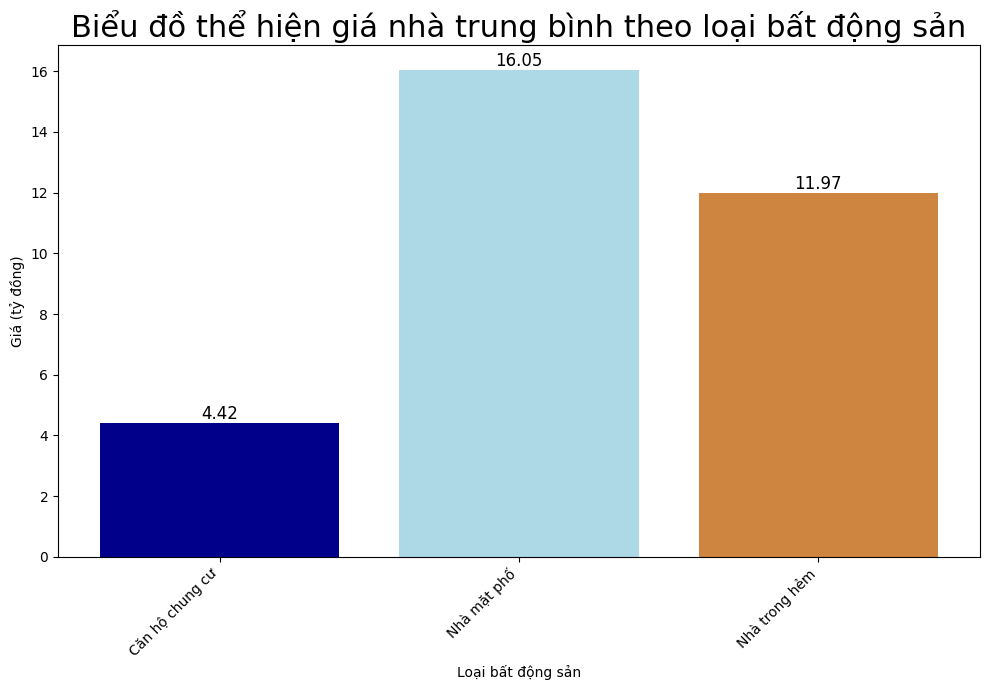

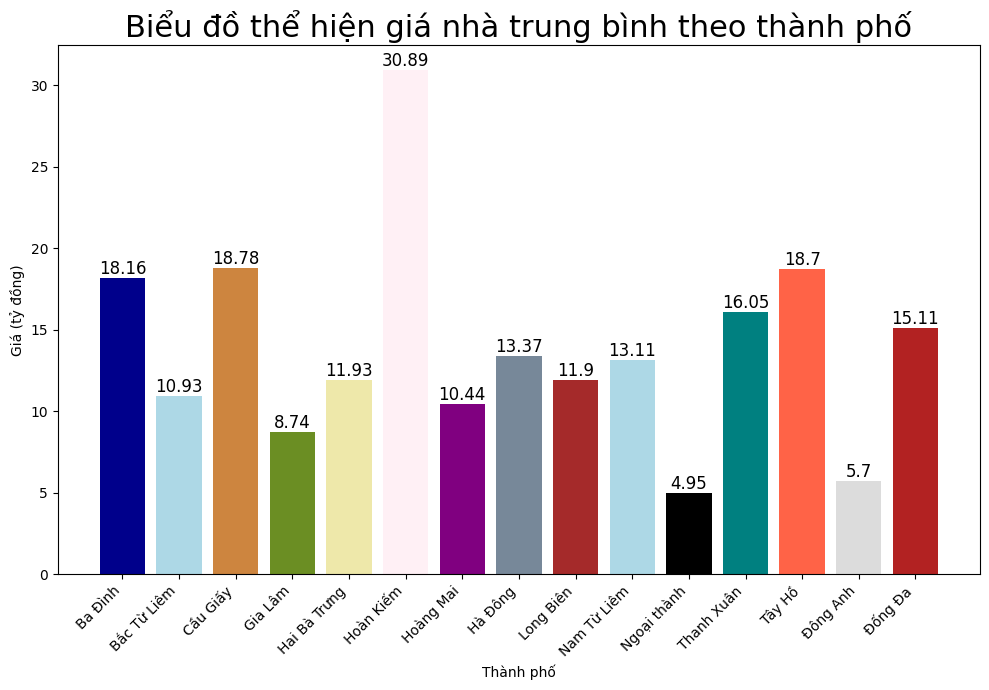

In [6]:
import random
count = 0
for feature in visualized_features:
    N = len(feature_unique_value[feature])
    ind = np.arange(N) 
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=N) 
    text_value = {}
    for i in ind:
        text_value[i] = feature_unique_value[feature][i]
        
    fig = plt.subplots(figsize=(10, 7))
    plt.bar(ind, feature_unique_value[feature], color=c)
    
    for key in text_value:
        plt.text(key, text_value[key], float(round(text_value[key], 2)), 
                horizontalalignment='center', verticalalignment='bottom', 
                fontdict={'fontweight':500, 'size':12})
    
    # Decide whether to rotate labels based on number of categories and label length
    max_label_length = max([len(str(label)) for label in feature_unique_fields[feature]])
    available_width = 10  # Figure width in inches
    
    # Apply rotation if many values or long labels
    if N > 5 or (N * max_label_length > 30):
        plt.xticks(ind, list(feature_unique_fields[feature]), rotation=45, ha='right')
    else:
        plt.xticks(ind, list(feature_unique_fields[feature]))  # No rotation
    
    plt.xlabel(labels[count])
    plt.ylabel("Giá (tỷ đồng)")
    plt.title(titles[count], fontsize=22)
    plt.tight_layout()
    count += 1
    
plt.show()

# Preprocessing to be ready for predict 

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')
numerical_cols

['area',
 'floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'street_in_front_of_house',
 'width']

In [9]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()
categorical_cols

['type', 'district']

In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)     
    ],
    remainder='passthrough' 
)


In [11]:
y_train = df_train['price'].copy()
y_val = df_val['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)

In [12]:
y_train.to_numpy()
y_val.to_numpy()

array([ 3.2  ,  8.95 , 14.2  , 20.   , 34.5  , 28.5  ,  3.15 ,  4.   ,
        9.   , 22.   , 15.5  , 13.6  , 14.7  ,  6.2  ,  6.5  , 22.5  ,
       10.3  ,  7.5  , 14.2  , 12.5  , 19.2  , 10.   , 20.   , 19.   ,
       11.   ,  9.8  ,  6.3  ,  6.9  , 16.5  , 14.1  ,  7.3  , 12.   ,
        1.7  ,  9.9  ,  6.95 ,  7.2  ,  8.95 ,  7.5  ,  7.5  ,  1.65 ,
       23.5  ,  9.6  ,  4.75 ,  8.3  , 19.   , 13.6  ,  8.65 ,  5.85 ,
        6.95 , 15.5  ,  3.5  , 16.6  ,  8.6  ,  5.8  ,  1.15 , 38.   ,
        6.3  ,  6.5  , 16.8  ,  7.7  ,  6.4  , 45.   , 26.5  , 13.5  ,
        8.5  ,  5.8  , 40.   , 30.   ,  5.5  ,  8.9  ,  1.6  , 25.   ,
        5.8  ,  7.6  , 10.8  , 20.   ,  8.8  ,  6.85 , 34.   , 13.2  ,
        3.7  , 25.5  ,  8.   ,  3.35 , 11.5  , 12.7  , 28.   , 15.9  ,
        8.4  ,  2.25 ,  9.3  ,  5.6  , 48.   , 27.5  ,  5.4  , 21.6  ,
       10.8  , 41.   , 16.   ,  8.1  ,  6.9  ,  4.8  ,  7.5  , 17.   ,
        5.2  , 29.2  , 27.7  , 27.   , 18.6  , 10.   ,  6.3  , 19.5  ,
      

In [13]:
y_train.shape, y_val.shape

((1945,), (649,))

In [14]:
X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

In [15]:
from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='poly', gamma=0.0975, C=5.1, epsilon=2.4798, coef0 = 2.3)
svr_model.fit(X_train, y_train)
y_pred_val = svr_model.predict(X_val)
y_test_pred = svr_model.predict(X_test)
svr_submit = pd.DataFrame({
    'Id': df_test.index,
    'TARGET': y_test_pred
})
svr_submit.to_csv('data/svr_model.csv', index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Giả sử X_train, y_train, X_val, y_val đã được định nghĩa

r2_scores = []
C_range = range(1, 101)  # Từ 1 đến 99

best_score = -float('inf')
best_params = {}

for C_value in C_range: 
    model = SVR(kernel='rbf', C=C_value)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    score = r2_score(y_val, y_pred_val)
    print(f"C = {C_value}, R² = {score:.4f}")
    r2_scores.append(score)

    if score > best_score:
        best_score = score
        best_params = {
            'C': C_value
        }

print("\nBest parameters with highest R² score:")
print(f"C = {best_params['C']}, R² = {best_score:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(C_range, r2_scores)
plt.title('Sự thay đổi R² theo tham số C')
plt.xlabel('Giá trị C')
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()

C = 1, R² = 0.6220
C = 2, R² = 0.6754
C = 3, R² = 0.6967
C = 4, R² = 0.7071
C = 5, R² = 0.7136
C = 6, R² = 0.7192
C = 7, R² = 0.7241
C = 8, R² = 0.7288
C = 9, R² = 0.7323
C = 10, R² = 0.7348
C = 11, R² = 0.7369
C = 12, R² = 0.7385
C = 13, R² = 0.7394
C = 14, R² = 0.7404


C = 0.01, RMSE Train = 9.7181, RMSE Val = 9.3895
C = 0.02, RMSE Train = 9.0267, RMSE Val = 8.7428
C = 0.03, RMSE Train = 8.5280, RMSE Val = 8.2698
C = 0.04, RMSE Train = 8.1594, RMSE Val = 7.9244
C = 0.05, RMSE Train = 7.9239, RMSE Val = 7.6959
C = 0.060000000000000005, RMSE Train = 7.7243, RMSE Val = 7.5083
C = 0.06999999999999999, RMSE Train = 7.5660, RMSE Val = 7.3554
C = 0.08, RMSE Train = 7.4600, RMSE Val = 7.2502
C = 0.09, RMSE Train = 7.3487, RMSE Val = 7.1401
C = 0.09999999999999999, RMSE Train = 7.2629, RMSE Val = 7.0540
C = 0.11, RMSE Train = 7.1910, RMSE Val = 6.9833
C = 0.12, RMSE Train = 7.1201, RMSE Val = 6.9126
C = 0.13, RMSE Train = 7.0762, RMSE Val = 6.8663
C = 0.14, RMSE Train = 7.0244, RMSE Val = 6.8110
C = 0.15000000000000002, RMSE Train = 6.9840, RMSE Val = 6.7692
C = 0.16, RMSE Train = 6.9503, RMSE Val = 6.7348
C = 0.17, RMSE Train = 6.9385, RMSE Val = 6.7187
C = 0.18000000000000002, RMSE Train = 6.9143, RMSE Val = 6.6904
C = 0.19, RMSE Train = 6.9067, RMSE Val = 

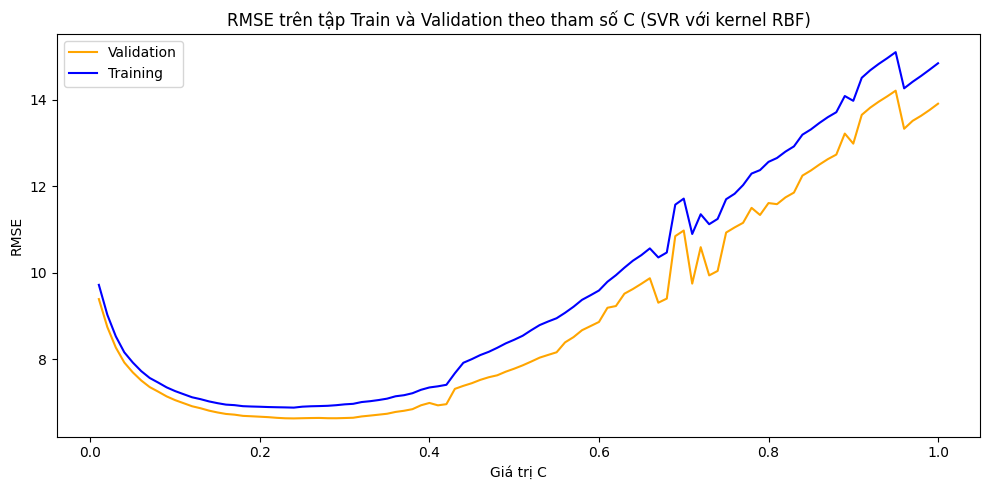

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

C_range = np.linspace(0.01, 1, 100)
rmse_val_scores = []
rmse_train_scores = []
best_rmse = float('inf')
best_params = {}

for C_val in C_range:
    model = SVR(kernel='rbf', C=C_val)
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_val_scores.append(rmse_val)
    
    # Dự đoán trên tập train
    y_train_pred = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_train_scores.append(rmse_train)

    print(f"C = {C_val}, RMSE Train = {rmse_train:.4f}, RMSE Val = {rmse_val:.4f}")
    
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_params = {'C': C_val}

print("\nBest Validation RMSE:")
print(f"C = {best_params['C']}, RMSE = {best_rmse:.4f}")

# Vẽ biểu đồ RMSE
plt.figure(figsize=(10, 5))
plt.plot(C_range, rmse_val_scores, label='Validation', color='orange')
plt.plot(C_range, rmse_train_scores, label='Training', color='blue')
plt.title('RMSE trên tập Train và Validation theo tham số C (SVR với kernel RBF)')
plt.xlabel('Giá trị C')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()


Best epsilon: 2.2278 with RMSE (val) = 12.4365


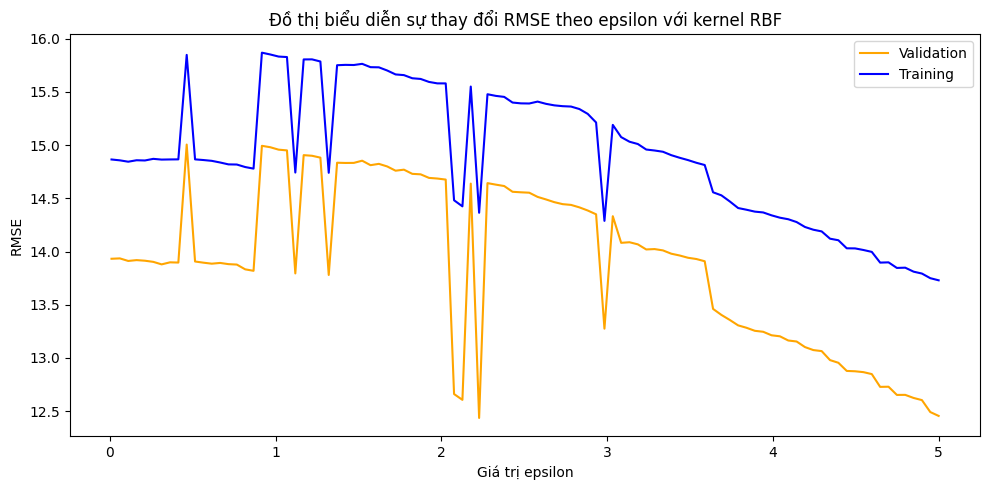

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

epsilon_values = np.linspace(0.01, 5, 100)
rmse_val_scores = []
rmse_train_scores = []

best_rmse = float('inf')
best_params = {}

for eps in epsilon_values:
    model = SVR(kernel='sigmoid', epsilon=eps)
    model.fit(X_train, y_train)

    # Dự đoán và tính RMSE cho tập validation
    y_pred_val = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_val_scores.append(rmse_val)

    # Dự đoán và tính RMSE cho tập train
    y_pred_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_train_scores.append(rmse_train)

    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_params = {'epsilon': eps}

print(f"Best epsilon: {best_params['epsilon']:.4f} with RMSE (val) = {best_rmse:.4f}")

# Vẽ biểu đồ RMSE theo epsilon
plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, rmse_val_scores, label='Validation', color='orange')
plt.plot(epsilon_values, rmse_train_scores, label='Training', color='blue')
plt.title('Đồ thị biểu diễn sự thay đổi RMSE theo epsilon với kernel RBF')
plt.xlabel('Giá trị epsilon')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()


Best gamma: 0.0513 with RMSE = 5.9147


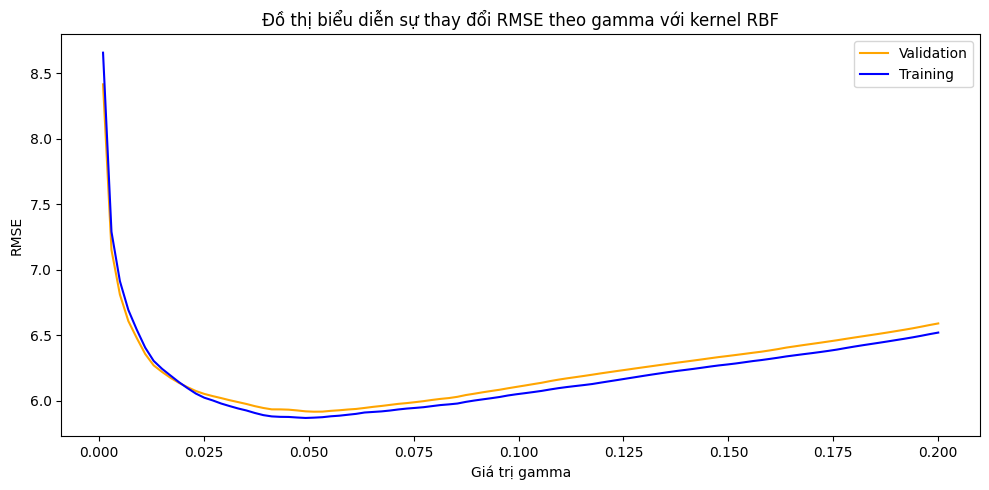

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

gamma_values = np.linspace(0.001, 0.2, 100)
rmse_val_scores = []
rmse_train_scores = []

best_rmse = float('inf')
best_gamma = None

for gamma in gamma_values:
    model = SVR(kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)

    # RMSE trên validation
    y_pred_val = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    rmse_val_scores.append(rmse_val)

    # RMSE trên train
    y_pred_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_train_scores.append(rmse_train)

    # Tìm gamma tốt nhất theo validation RMSE
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_gamma = gamma

print(f"Best gamma: {best_gamma:.4f} with RMSE = {best_rmse:.4f}")

# Vẽ biểu đồ RMSE theo gamma
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, rmse_val_scores, label='Validation', color='orange')
plt.plot(gamma_values, rmse_train_scores, label='Training', color='blue')
plt.title('Đồ thị biểu diễn sự thay đổi RMSE theo gamma với kernel RBF')
plt.xlabel('Giá trị gamma')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()



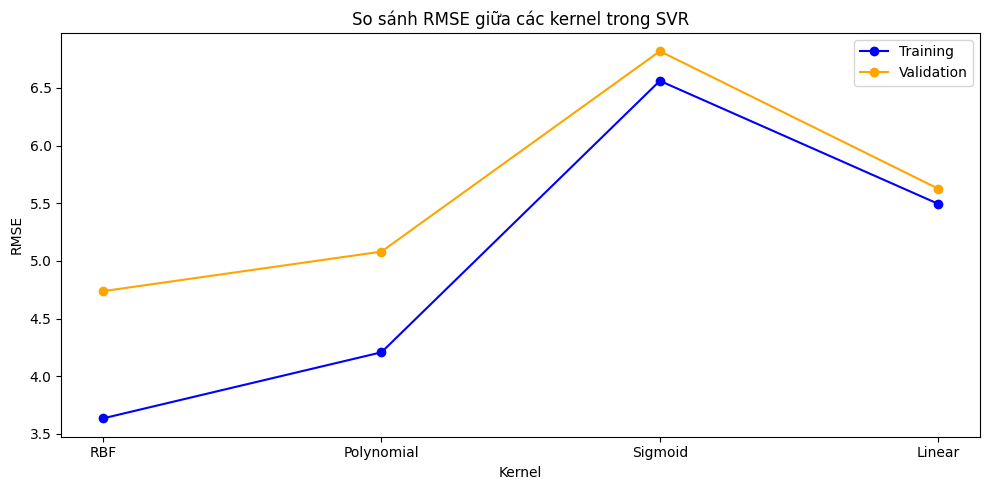

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Huấn luyện và tính RMSE cho từng kernel
model_RBF = SVR(kernel='rbf', gamma=0.0513, C=51, epsilon=2.5806)
model_RBF.fit(X_train, y_train)
rmse_train_rbf = np.sqrt(mean_squared_error(y_train, model_RBF.predict(X_train)))
rmse_val_rbf = np.sqrt(mean_squared_error(y_val, model_RBF.predict(X_val)))

model_poly = SVR(kernel='poly', C=5, epsilon=1.97, degree=3)
model_poly.fit(X_train, y_train)
rmse_train_poly = np.sqrt(mean_squared_error(y_train, model_poly.predict(X_train)))
rmse_val_poly = np.sqrt(mean_squared_error(y_val, model_poly.predict(X_val)))

model_linear = SVR(kernel='linear', C=26, epsilon=4.3)
model_linear.fit(X_train, y_train)
rmse_train_linear = np.sqrt(mean_squared_error(y_train, model_linear.predict(X_train)))
rmse_val_linear = np.sqrt(mean_squared_error(y_val, model_linear.predict(X_val)))

model_sigmoid = SVR(kernel='sigmoid', C=0.24, epsilon=2.22)
model_sigmoid.fit(X_train, y_train)
rmse_train_sigmoid = np.sqrt(mean_squared_error(y_val, model_sigmoid.predict(X_val)))
rmse_val_sigmoid = np.sqrt(mean_squared_error(y_train, model_sigmoid.predict(X_train)))

# Danh sách các kernel và RMSE tương ứng
kernels = ['RBF', 'Polynomial', 'Sigmoid', 'Linear']
rmse_train = [rmse_train_rbf, rmse_train_poly, rmse_train_sigmoid, rmse_train_linear]
rmse_val = [rmse_val_rbf, rmse_val_poly, rmse_val_sigmoid, rmse_val_linear]

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(kernels, rmse_train, marker='o', label='Training', color='blue')
plt.plot(kernels, rmse_val, marker='o', label='Validation', color='orange')
plt.title('So sánh RMSE giữa các kernel trong SVR')
plt.xlabel('Kernel')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()


Best gamma: 1.0000 with RMSE = 5.0743


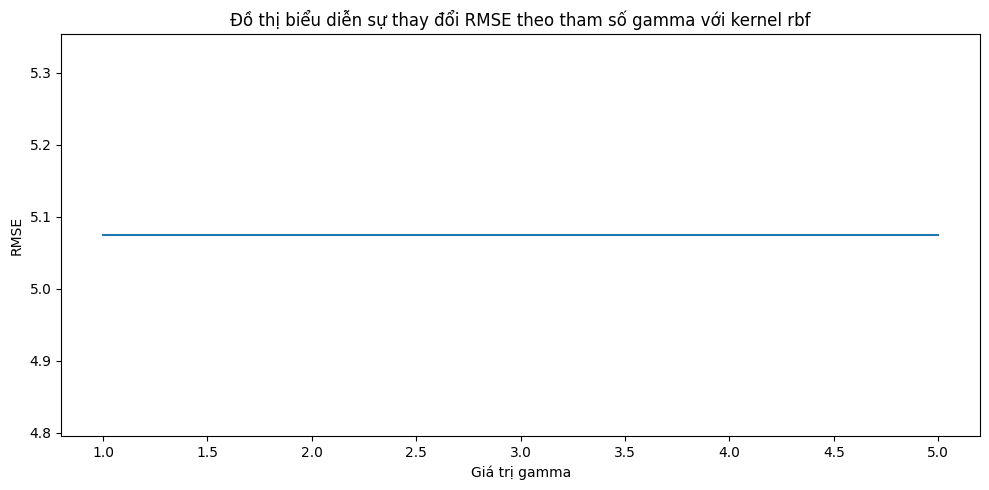


Đang huấn luyện mô hình với dropout = 0.28 ...
Train RMSE: 2.7214, Val RMSE: 4.7195
